In [ ]:
%%capture
#Install libraries
!pip install langchain
!pip install cohere
!pip install unstructured
!pip install "unstructured[pdf]"
!pip install qdrant-client

In [ ]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 0s (458 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 121918 

In [ ]:
#Import modules
from langchain.embeddings.cohere import CohereEmbeddings
from langchain.llms import Cohere
from langchain.prompts import PromptTemplate
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.chains.question_answering import load_qa_chain
from langchain.chains import RetrievalQA
from langchain.vectorstores import Qdrant
from langchain.document_loaders import TextLoader
from langchain.document_loaders import DirectoryLoader
from langchain.retrievers import TFIDFRetriever
from langchain.memory import ConversationBufferMemory


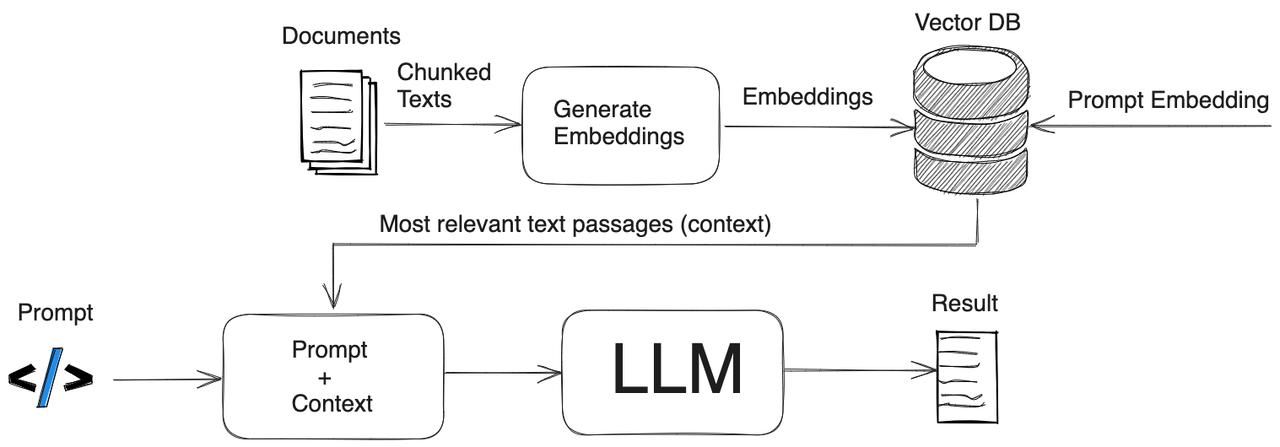

In [ ]:
#Config Prompt
prompt_template = """
Eres un asistente personal de IA diseñado para responder a preguntas basadas en documentos. Tienes acceso a un conjunto de documentos y al historial de chat para proporcionar respuestas precisas.

Instrucciones:

Si la pregunta del usuario requiere información específica de los documentos proporcionados, responde basándote únicamente en el contenido de dichos documentos. No genere una respuesta que no esté respaldada por los documentos.
Si no puedes encontrar la respuesta a la pregunta del usuario en los documentos proporcionados, responde con un simple «No lo sé».
Utiliza viñetas sólo cuando sea necesario para crear una lista.
Utiliza los siguientes documentos y el historial de chat para responder a la pregunta:

Question:{question}

Documents: {context}

Chat History: {history}

"""
PROMPT = PromptTemplate(
    template=prompt_template, input_variables=["context", "question", "history"]
)


In [ ]:
from langchain_community.document_loaders import PyPDFDirectoryLoader

loader = PyPDFDirectoryLoader("/content/Docs")
docs = loader.load()

In [ ]:
#file_dir="/content/test"
#loader = DirectoryLoader(file_dir, glob='*.pdf')
#documents = loader.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
texts = text_splitter.split_documents(docs)
len(texts)

701

In [ ]:
cohere_api_key='ZKFi7w3dTu3KwLhjzgJ24Epd6rRaMvAruietZJim'
embeddings = CohereEmbeddings(
        model="multilingual-22-12", cohere_api_key=cohere_api_key
    )

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `CohereEmbeddings` was deprecated in LangChain 0.0.30 and will be removed in 0.3.0. An updated version of the class exists in the langchain-cohere package and should be used instead. To use it run `pip install -U langchain-cohere` and import as `from langchain_cohere import CohereEmbeddings`.
  warn_deprecated(


In [ ]:
#db = Qdrant.from_documents(texts, embeddings, location=":memory:", collection_name="test", distance_func="Dot")

db = TFIDFRetriever.from_documents(texts)

In [ ]:
qa = RetrievalQA.from_chain_type(llm=Cohere(model="command-nightly", temperature=0,cohere_api_key=cohere_api_key,max_tokens=300),
                                 chain_type="stuff",
                                 retriever=db,
                                 verbose=False,
                                 chain_type_kwargs = {"verbose": False,"prompt": PROMPT,
                                                      "memory": ConversationBufferMemory(
                                                                memory_key="history",
                                                                input_key="question"),})

#for question in questions:
answer = qa.run({"query": "Que sectores afectará la IA?"})
print(answer)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `Cohere` was deprecated in LangChain 0.1.14 and will be removed in 0.3.0. An updated version of the class exists in the langchain-cohere package and should be used instead. To use it run `pip install -U langchain-cohere` and import as `from langchain_cohere import Cohere`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Según los documentos proporcionados, la IA afectará a una amplia gama de sectores y ocupaciones. Aquí hay una lista de los sectores que se verán más afectados:

- Gestión empresarial (32%)
- Ventas y áreas relacionadas (31%)
- Informática y matemáticas (29%)
- Agricultura, pesca y silvicultura (28%)
- Servicio de protección (28%)
- Profesionales y técnicos de la salud (28%)
- Instrucciones educativas (28%)

Además, los documentos mencionan que casi todas las industrias (25%) experimentarán algún grado de complementariedad con la IA, lo que sugiere que la IA tendrá un impacto generalizado en la mayoría de los sectores.


In [ ]:
answer = qa.run({"query": "Si soy panadero, me voy a quedar sin trabajo?"})
print(answer)

No lo sé.


In [ ]:
answer = qa.run({"query": "que tecnicas de IA puede usar una empresa?"})
print(answer)

Las empresas pueden utilizar una variedad de técnicas de IA, incluidas:

- Traducción de idiomas (DeepL)
- Generación de imágenes a partir de texto (Craiyon)
- Investigación y construcción de sistemas de IA seguros (DeepMind)
- Desarrollo de software (Microsoft)
- Investigación de nuevos medios para mejorar las capacidades inventivas humanas (Midjourney)
- Investigación y despliegue de IA, incluido el aprendizaje automático (OpenAI)
- Desarrollo de sistemas de IA para comprender y generar lenguaje natural (AI21 Labs)
- Despliegue de modelos fundamentales de IA (Aleph Alpha)
- Proporcionar recursos y libertad para proyectos de IA (Alphabet)
- Creación de sistemas de IA seguros y éticos (Anthropic)


In [ ]:
answer = qa.run({"query": "Cuales son los roles y empleos mas afectados por la IA"})
print(answer)

- Funciones administrativas
- Funciones legales


In [ ]:
answer = qa.run({"query": "como puedo llevar a cabo un plan de transformacion IA"})
print(answer)

Para llevar a cabo un plan de transformación de IA, se sugieren los siguientes pasos:

- Formar un equipo interno de IA: Con la experiencia adquirida en proyectos piloto, es el momento de formar un equipo dedicado a la IA. Este equipo será responsable de llevar a cabo futuros proyectos de IA e integrar la IA en diversas áreas de la empresa.
- Establecer criterios de aceptación: Antes de embarcarse en un proyecto de IA, es importante establecer criterios claros, como la precisión y objetividad del modelo.
- Elegir tecnologías y modelos de IA confiables, interpretables y dirigibles: Es importante seleccionar tecnologías y modelos de IA que sean confiables, interpretables y que se puedan dirigir según las necesidades específicas de la empresa.
- Integrar la IA en diversas áreas de la empresa: El equipo de IA debe trabajar en colaboración con otros departamentos para identificar oportunidades donde la IA pueda tener un impacto significativo.
- Monitorear y ajustar: Finalmente, es important

In [ ]:
answer = qa.run({"query": "como puedo preparar la estartegia de IA para mi empresa"})
print(answer)

Para preparar una estrategia de IA para su empresa, se sugieren los siguientes pasos:

- Desarrollar una comprensión clara y profunda de lo que la IA puede ofrecer: Es esencial entender las capacidades y los posibles beneficios de la IA para su empresa antes de comenzar a formular una estrategia.
- Identificar las áreas de la empresa más afectadas por la IA: Determine los departamentos o funciones que se verán más impactados por la IA. Esto le ayudará a priorizar y enfocar sus esfuerzos en la implementación de la IA.
- Nombrar un líder o director de IA: Designar a una persona responsable de supervisar todos los proyectos relacionados con la IA, garantizando su implementación eficiente y efectiva.
- Formar un equipo dedicado a la IA: Reúna un equipo interno con experiencia en IA para llevar a cabo proyectos de IA e integrar la IA en diferentes áreas de su empresa.
- Establecer criterios de aceptación: Antes de comenzar cualquier proyecto de IA, defina criterios claros, como la precisión

In [ ]:
answer = qa.run({"query": "es chatgpt el mejor modelo para mi empresa?"})
print(answer)

ChatGPT puede ser una excelente opción para su empresa, ya que ofrece una variedad de beneficios y aplicaciones prácticas. Aquí hay algunas razones por las que ChatGPT podría ser el mejor modelo para su organización:

- Agilizar el trabajo de las personas: ChatGPT puede ayudar a automatizar y acelerar diversas tareas, lo que permite a sus empleados concentrarse en trabajos más estratégicos y creativos.
- Atención al cliente: ChatGPT puede utilizarse para brindar un servicio al cliente rápido, eficiente y confiable. Puede manejar consultas básicas, proporcionar información y ayudar a los clientes las 24 horas del día, los 7 días de la semana.
- Herramienta de apoyo: ChatGPT puede actuar como una herramienta de apoyo para sus empleados, ayudándolos en sus tareas diarias y mejorando su productividad.
- Fácil adopción: ChatGPT es fácil de implementar y utilizar. Puede introducirse gradualmente en su empresa, permitiendo que los empleados se familiaricen con la herramienta y se adapten a el

# Example Streamlit


In [ ]:
!pip install databutton

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
from langchain.chains import RetrievalQA

# Define the qa variable
qa = RetrievalQA.from_chain_type(llm=Cohere(model="command-nightly", temperature=0, cohere_api_key=cohere_api_key, max_tokens=300),
                                 chain_type="stuff",
                                 retriever=db,
                                 verbose=False,
                                 chain_type_kwargs={"verbose": False, "prompt": PROMPT,
                                                    "memory": ConversationBufferMemory(memory_key="history", input_key="question")})

# Create a Gradio interface
iface = gr.Interface(
    fn=qa.run,  # function that gets called when a question is submitted
    inputs="text",  # input type (in this case, a text field)
    outputs="text",  # output type (in this case, a text field)
    title="Asistente de IA",  # title of the interface
    description="Pregúntame algo sobre los documentos"  # description of the interface
)

# Launch the interface
iface.launch()